In [1]:
import random
from tqdm.autonotebook import tqdm
import numpy as np
import statsmodels as sm
import statsmodels.tsa.arima_process
import utils
import matplotlib.pyplot as plt
import files
import pickle
import scipy
import argparse
import os

/tmp/ipykernel_31885/3082487949.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Load data

Get the data file

In [24]:
# get name data with specifications
# name = files.get_name_data(n, regression=regression, noise=noise, params_noise=params_noise, seed=n_rep)

# get a specific dataset
name = "data/Friedman_ARMA_AR_0.1_MA_0.1_fixed_variance_10_seed_500_n_300.pkl"

print(name)
if os.path.isfile('data/'+name+'.pkl'):
    data = files.load_file('data', name, 'pkl')

data/Friedman_ARMA_AR_0.1_MA_0.1_fixed_variance_10_seed_500_n_300.pkl


## Data Description

### The formula to generate data is:
$$Y_t = 10 \sin(\pi X_{t,1}X_{t,2}) + 20(X_{t,3} - 0.5)^2 + 10 X_{t,4} + 5X_{t,5} + 0X_{t,6} + \epsilon_t$$

### X and Y shapes

In [28]:
data["X"].shape

(500, 6, 400)

Notice that the X data contains 500 experiments of 400 timestamps, with 6 variables.

In [29]:
data["Y"].shape

(500, 400)

Notice that the Y data contains 500 experiments of 400 timestamps

### Get the maximum timestamp

$n = T_0+T_1$

In [30]:
n = data['Y'].shape[1]
n

400

## Plot Data

Since there are 500 experiments we cannot plot those together, but take the $k^{th}$ experiment.

In [39]:
k = 0  # pick this yourself [0,500>
X = data['X'][k,:,:]  # k x d x n (experiments, covariates, sample size)
Y = data['Y'][k,:]  # n x 1 (sample size reponse)
T = np.arange(0, n)  # time stamps

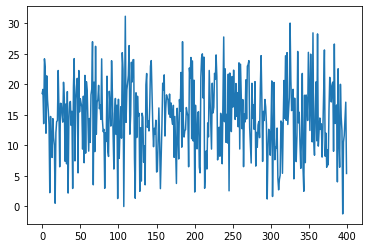

In [40]:
plt.plot(T,Y)
plt.show()

Let's plot a few

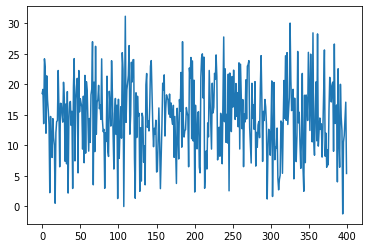

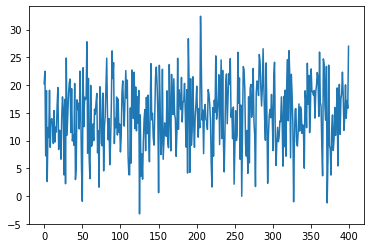

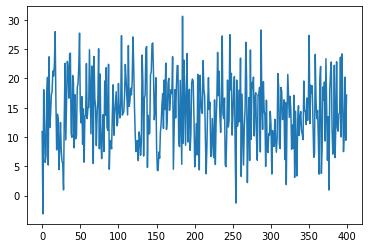

In [43]:
def plot_timeseries(data: dict, k: int):
    X = data['X'][k,:,:]  # k x d x n (experiments, covariates, sample size)
    Y = data['Y'][k,:]  # n x 1 (sample size reponse)
    T = np.arange(0, n)  # time stamps
    
    plt.plot(T,Y)
    plt.show()
    
for k in range(3):
    plot_timeseries(data, k)

## Remarks

This synthetic dataset has few timestamps, but it does not matter that much since it is for validation of the method.<br><br>

One approach could be to just use the command line from the README, since it also immediately applies ACI an EnbPI with RandomForestRegressor and LinearRegression. We could add models like MAPIE in this environment and extend the repo in this way.<br><br>

Another approach would be to use the AgACI and EnbPI models with synthetic data and embed those in a new repo. This seems to be the most intuitive way, but is more intensive.